- Smoother stability and disparity measure. Try with slots of 1000 timesteps
- Box plot to compare dynamic-fixed Q
- Correlation between stability and disparity
- aV distribution in P1 and P5
Get inspiration from: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [2]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import scipy.stats as sci
import statistics as stt
import seaborn as sns
import pandas as pd
import numpy as np
import joypy
import csv

In [3]:
d = {}
num_simulations=50
for i in range(num_simulations):
    csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/dynamicEnv/staticQ/' + str(i+1) + '.csv'
    d["data{0}".format(i)] = pd.read_csv(csv_filename)

In [4]:
simulations = len(d)
timesteps = d['data0'].shape[0]

print('Number of simulations = ' + str(simulations))
print('Number of columns = ' + str(d['data0'].shape[1]))
print('Number of timesteps = ' + str(timesteps))
print('Column names = ' + str(d['data0'].columns))

Number of simulations = 50
Number of columns = 10
Number of timesteps = 100000
Column names = Index(['Xposition', 'Yposition', 'aVtemperature', 'aVthirst', 'DriveTemp',
       'DriveThirst', 'TFtemperature', 'TFthirst', 'attractorQ', 'Grad_Temp'],
      dtype='object')


In [5]:
mean_slot = 100
aVTempSlotMean = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMean.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
    aVTempSlotMean.append(stt.mean(SlotMean))

In [6]:
aVThirstSlotMean = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMean.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    aVThirstSlotMean.append(stt.mean(SlotMean))

In [7]:
GradTempSlotMean = []
for i in range(int(timesteps/mean_slot)):
    GradTempSlotMean.append(stt.mean(d[dict_name]['Grad_Temp'][mean_slot*i:mean_slot*(i+1)]))

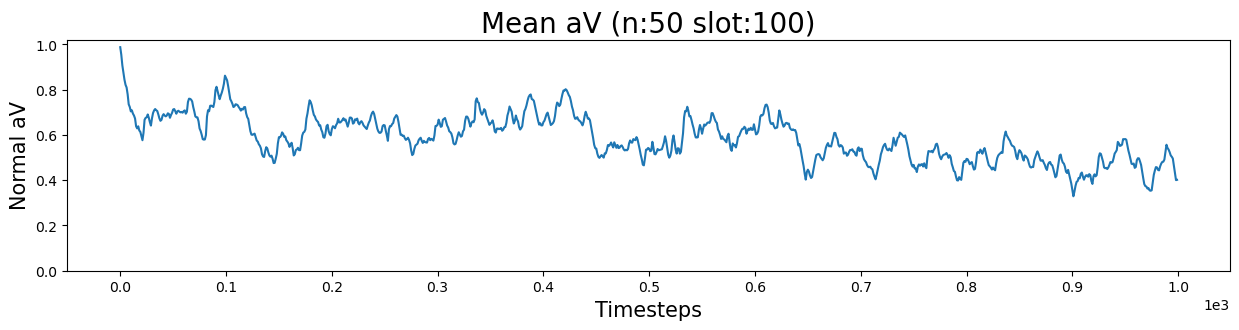

Normality test = NormaltestResult(statistic=5.947840004845922, pvalue=0.0511025948906432)


In [8]:
plt.figure(figsize=(15, 3))
plt.plot(aVTempSlotMean)
plt.xticks(np.arange(0, timesteps/100+1, step=timesteps/1000))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Mean aV (n:50 slot:100)', fontsize=20)
plt.ylabel('Normal aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.show()
print('Normality test = ' + str(sci.normaltest(aVTempSlotMean)))
if sci.normaltest(aVTempSlotMean)[1] < 0.05: print("Non-normal distribution")

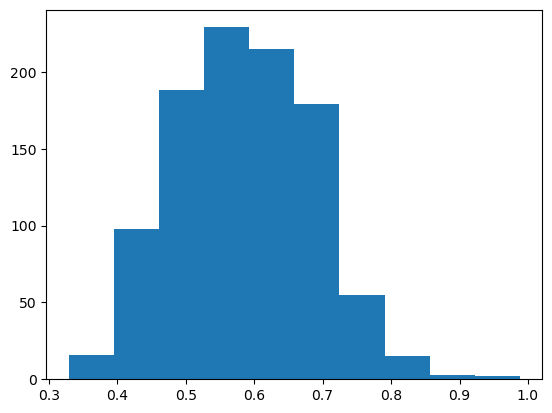

In [9]:
plt.hist(aVTempSlotMean, bins=10)
plt.show()

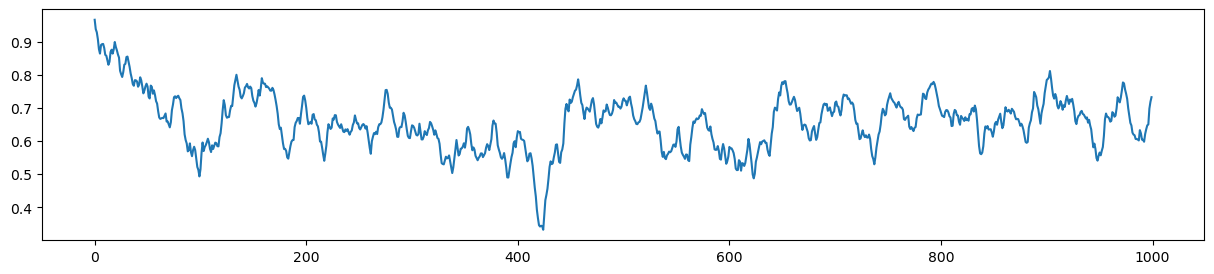

Normality test = NormaltestResult(statistic=27.918951701059008, pvalue=8.659178013232724e-07)
Non-normal distribution


In [10]:
plt.figure(figsize=(15, 3))
plt.plot(aVThirstSlotMean)
plt.show()
print('Normality test = ' + str(sci.normaltest(aVThirstSlotMean)))
if sci.normaltest(aVThirstSlotMean)[1] < 0.05: print("Non-normal distribution")

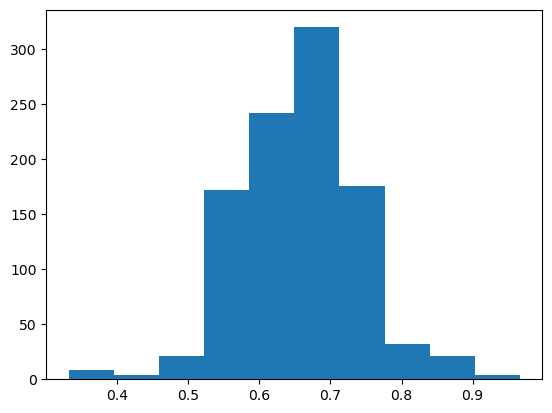

In [11]:
plt.hist(aVThirstSlotMean, bins=10)
plt.show()

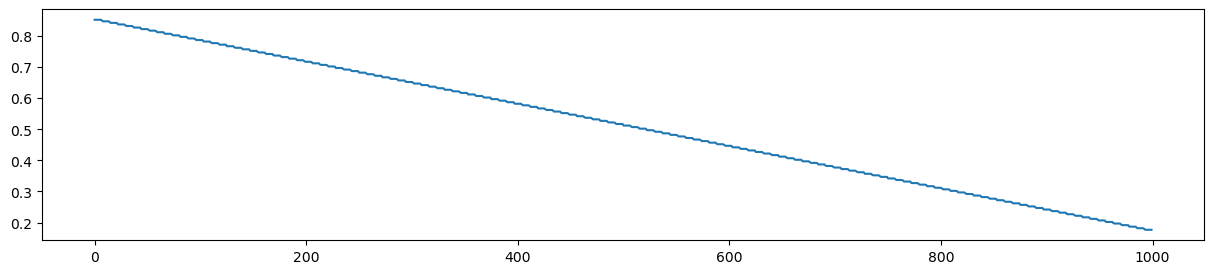

Normality test = NormaltestResult(statistic=735.896836639218, pvalue=1.5923271450580932e-160)
Non-normal distribution


In [12]:
plt.figure(figsize=(15, 3))
plt.plot(GradTempSlotMean)
plt.show()
print('Normality test = ' + str(sci.normaltest(GradTempSlotMean)))
if sci.normaltest(GradTempSlotMean)[1] < 0.05: print("Non-normal distribution")

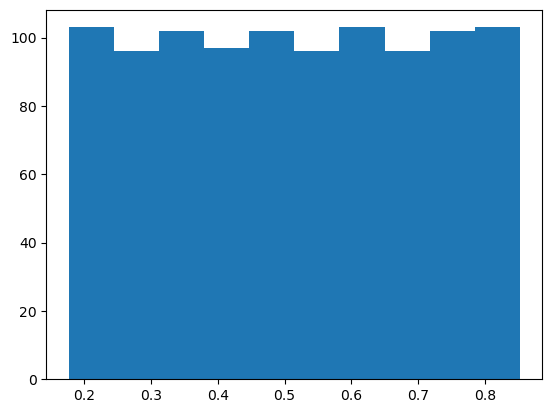

In [13]:
plt.hist(GradTempSlotMean, bins=10)
plt.show()

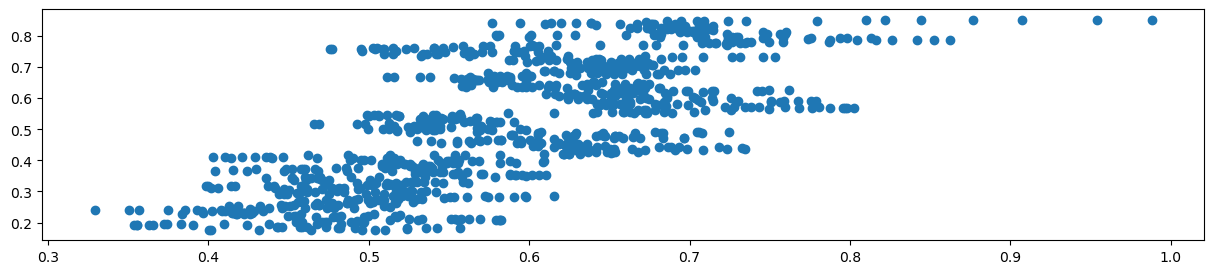

aVTempSlotMean: mean=0.586 stdv=0.100
GradTempSlotMean: mean=0.514 stdv=0.196
SpearmanrResult(correlation=0.7248040415754946, pvalue=1.1380946532907278e-163)


In [14]:
plt.figure(figsize=(15, 3))
plt.scatter(aVTempSlotMean, GradTempSlotMean)
plt.show()

print('aVTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(aVTempSlotMean), np.std(aVTempSlotMean)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print(sci.spearmanr(aVTempSlotMean, GradTempSlotMean))

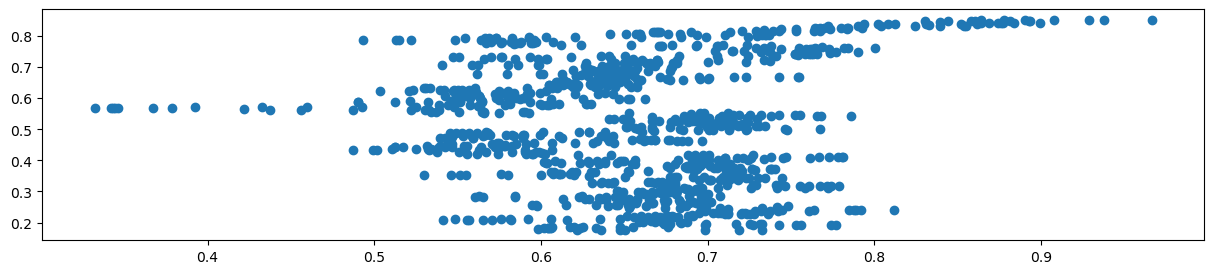

aVTempSlotMean: mean=0.657 stdv=0.083
GradTempSlotMean: mean=0.514 stdv=0.196
SpearmanrResult(correlation=0.027761747151258485, pvalue=0.38050046507872803)


In [15]:
plt.figure(figsize=(15, 3))
plt.scatter(aVThirstSlotMean, GradTempSlotMean)
plt.show()

print('aVTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(aVThirstSlotMean), np.std(aVThirstSlotMean)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print(sci.spearmanr(aVThirstSlotMean, GradTempSlotMean))

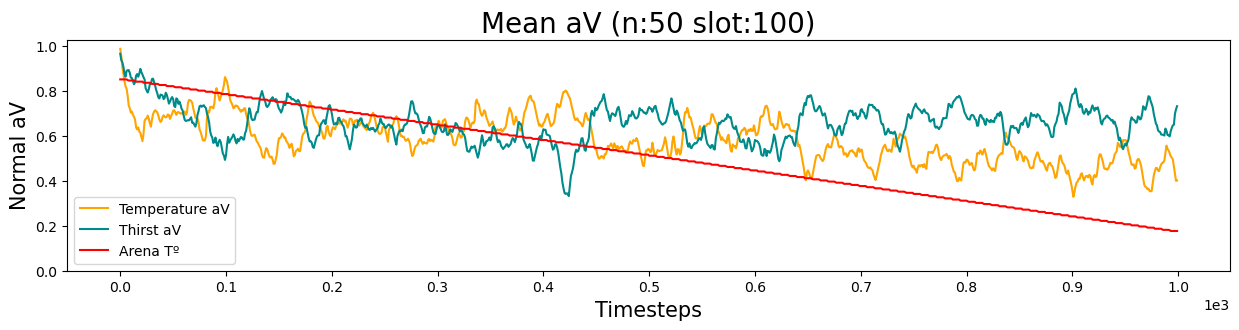

In [16]:
plt.figure(figsize=(15, 3))
plt.plot(aVTempSlotMean, label='Temperature aV', color="orange")
plt.plot(aVThirstSlotMean, label='Thirst aV', color="darkcyan")
plt.plot(GradTempSlotMean, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/100+1, step=timesteps/1000))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Mean aV (n:50 slot:100)', fontsize=20)
plt.ylabel('Normal aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

In [17]:
stability = []
stabilityVar=[]

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    Slotstability = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
        Slotstability.append((abs(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)])-stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))/2))
    stability.append((stt.mean(SlotMeanTemp)+stt.mean(SlotMeanThirst))/2)
    stabilityVar.append(stt.variance(Slotstability))

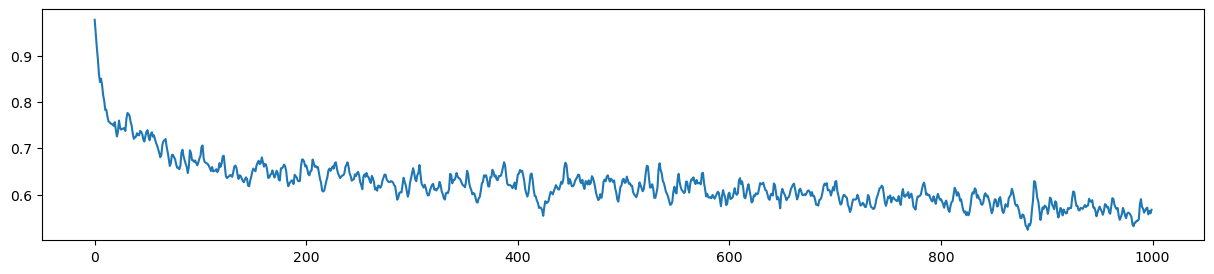

Normality test = NormaltestResult(statistic=461.59018184372366, pvalue=5.847437145914587e-101)
Non-normal distribution


In [18]:
plt.figure(figsize=(15, 3))
plt.plot(stability)
plt.show()
print('Normality test = ' + str(sci.normaltest(stability)))
if sci.normaltest(stability)[1] < 0.05: print("Non-normal distribution")

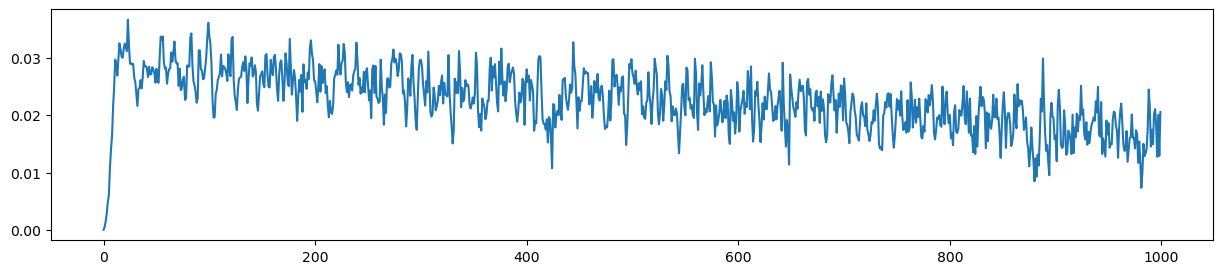

Normality test = NormaltestResult(statistic=38.64045728521075, pvalue=4.067535119882058e-09)
Non-normal distribution


In [19]:
plt.figure(figsize=(15, 3))
plt.plot(stabilityVar)
plt.show()
print('Normality test = ' + str(sci.normaltest(stabilityVar)))
if sci.normaltest(stabilityVar)[1] < 0.05: print("Non-normal distribution")

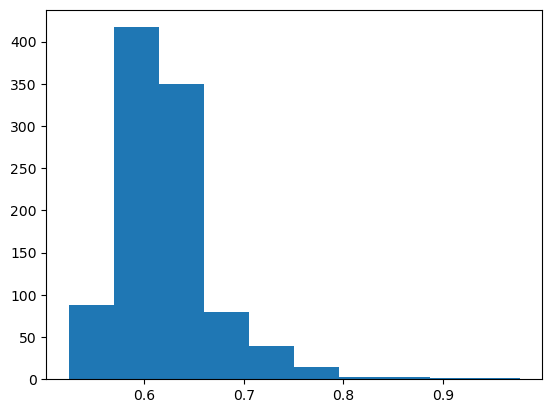

In [20]:
plt.hist(stability, bins=10)
plt.show()

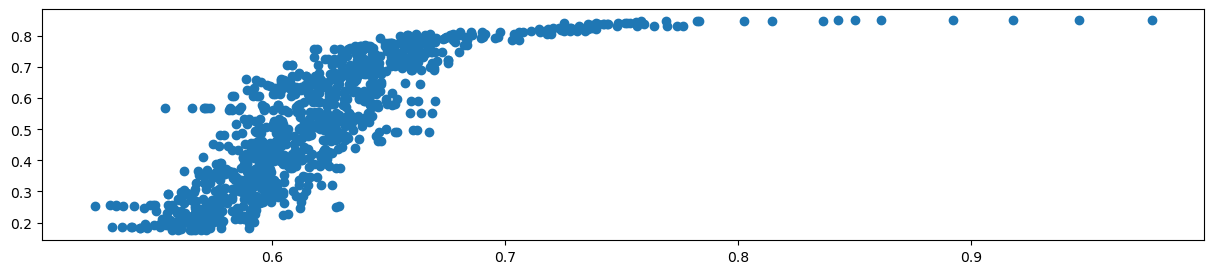

aVTempSlotMean: mean=0.621 stdv=0.050
GradTempSlotMean: mean=0.514 stdv=0.196
SpearmanrResult(correlation=0.8667541956244289, pvalue=8.686107533124292e-304)


In [21]:
plt.figure(figsize=(15, 3))
plt.scatter(stability, GradTempSlotMean)
plt.show()

print('aVTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(stability), np.std(stability)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print(sci.spearmanr(stability, GradTempSlotMean))

In [22]:
disparity = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    disparity.append(abs(stt.mean(SlotMeanTemp)-stt.mean(SlotMeanThirst)))

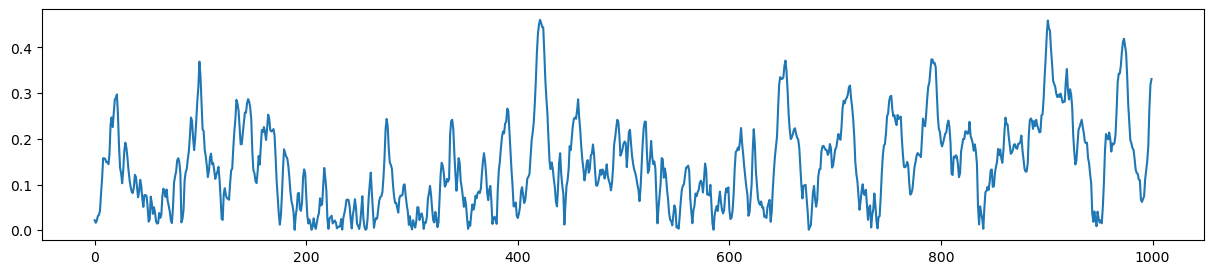

Normality test = NormaltestResult(statistic=73.83353947842063, pvalue=9.273648111415886e-17)
Non-normal distribution


In [23]:
plt.figure(figsize=(15, 3))
plt.plot(disparity)
plt.show()
print('Normality test = ' + str(sci.normaltest(disparity)))
if sci.normaltest(disparity)[1] < 0.05: print("Non-normal distribution")

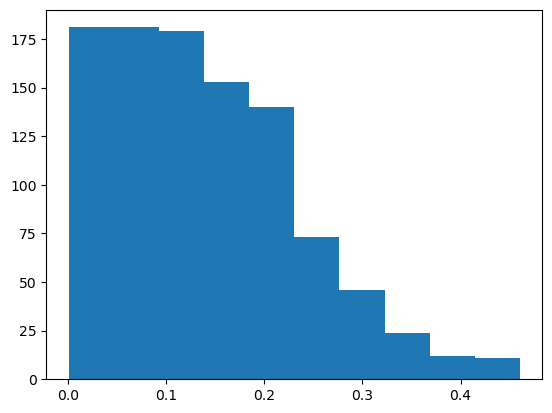

In [24]:
plt.hist(disparity, bins=10)
plt.show()

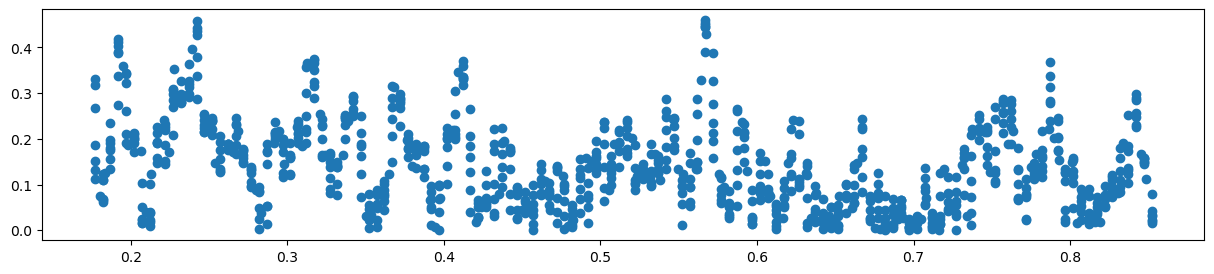

aVTempSlotMean: mean=0.141 stdv=0.095
GradTempSlotMean: mean=0.514 stdv=0.196
SpearmanrResult(correlation=-0.3275525710986287, pvalue=1.9398415495263872e-26)


In [30]:
plt.figure(figsize=(15, 3))
plt.scatter(GradTempSlotMean, disparity)
plt.show()

print('aVTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(disparity), np.std(disparity)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print(sci.spearmanr(disparity, GradTempSlotMean))

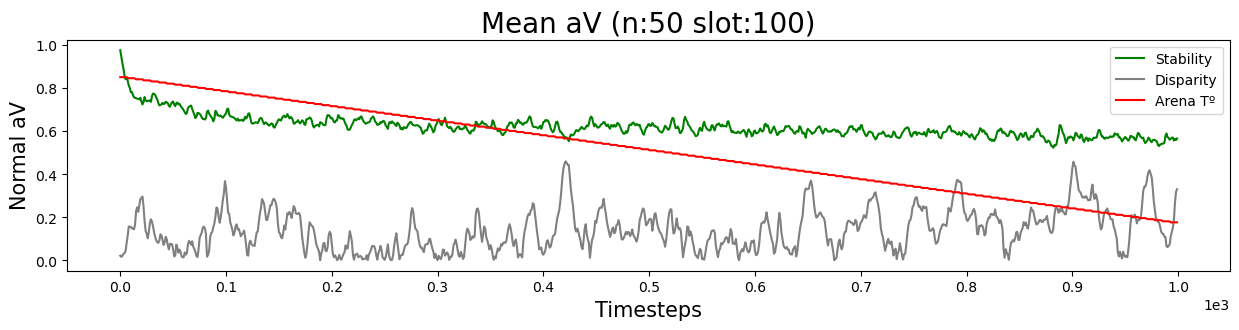

In [25]:
plt.figure(figsize=(15, 3))
plt.plot(stability, label='Stability', color="green")
plt.plot(disparity, label='Disparity', color="gray")
plt.plot(GradTempSlotMean, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/100+1, step=timesteps/1000))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Mean aV (n:50 slot:100)', fontsize=20)
plt.ylabel('Normal aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

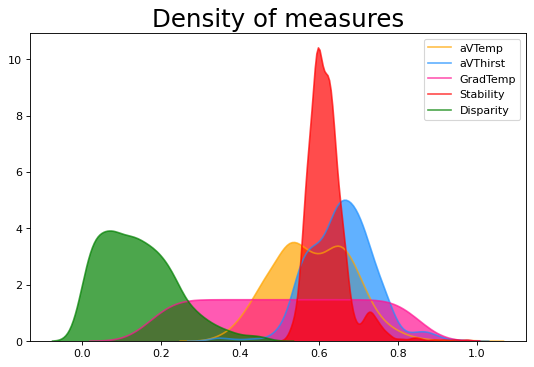

In [26]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(aVTempSlotMean, shade=True, color="orange", label="aVTemp", alpha=.7)
sns.kdeplot(aVThirstSlotMean, shade=True, color="dodgerblue", label="aVThirst", alpha=.7)
sns.kdeplot(GradTempSlotMean, shade=True, color="deeppink", label="GradTemp", alpha=.7)
sns.kdeplot(stability, shade=True, color="r", label="Stability", alpha=.7)
sns.kdeplot(disparity, shade=True, color="g", label="Disparity", alpha=.7)

# Decoration
plt.title('Density of measures', fontsize=22)
plt.legend()
plt.show()

In [27]:
mean_slot = 1000

stability = []
for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    stability.append((stt.mean(SlotMeanTemp)+stt.mean(SlotMeanThirst))/2)
    
disparity = []
for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    disparity.append(abs(stt.mean(SlotMeanTemp)-stt.mean(SlotMeanThirst)))
    
GradTempSlotMean = []
for i in range(int(timesteps/mean_slot)):
    GradTempSlotMean.append(stt.mean(d[dict_name]['Grad_Temp'][mean_slot*i:mean_slot*(i+1)]))

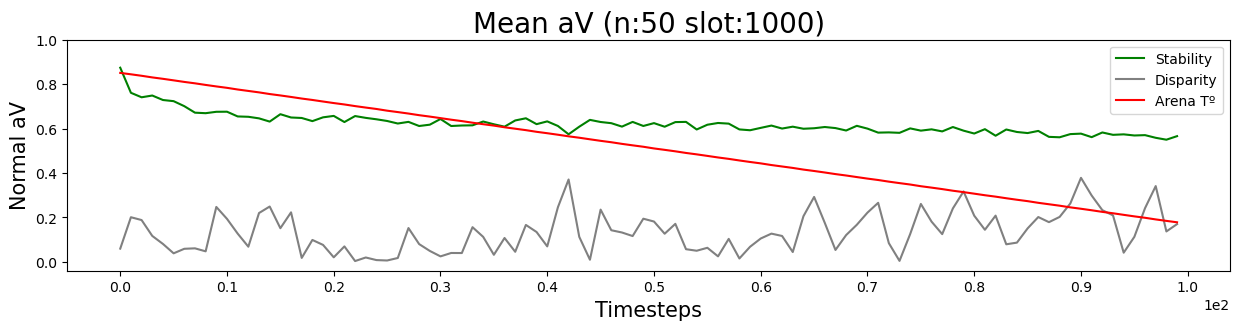

In [28]:
plt.figure(figsize=(15, 3))
plt.plot(stability, label='Stability', color="green")
plt.plot(disparity, label='Disparity', color="gray")
plt.plot(GradTempSlotMean, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/10000))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Mean aV (n:50 slot:1000)', fontsize=20)
plt.ylabel('Normal aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

In [29]:
mean_slot = 100
aVTempSlotMean = []
aVTempSlotVar = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVTempSlotMean.append(stt.mean(SlotMean))
    aVTempSlotVar.append(stt.variance(SlotMean))
    
aVThirstSlotMean = []
aVThirstSlotVar = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVThirstSlotMean.append(stt.mean(SlotMean))
    aVThirstSlotVar.append(stt.variance(SlotMean))
    
GradTempSlotMean = []
for i in range(int(timesteps/mean_slot)):
    GradTempSlotMean.append(stt.mean(d[dict_name]['Grad_Temp'][mean_slot*i:mean_slot*(i+1)]))

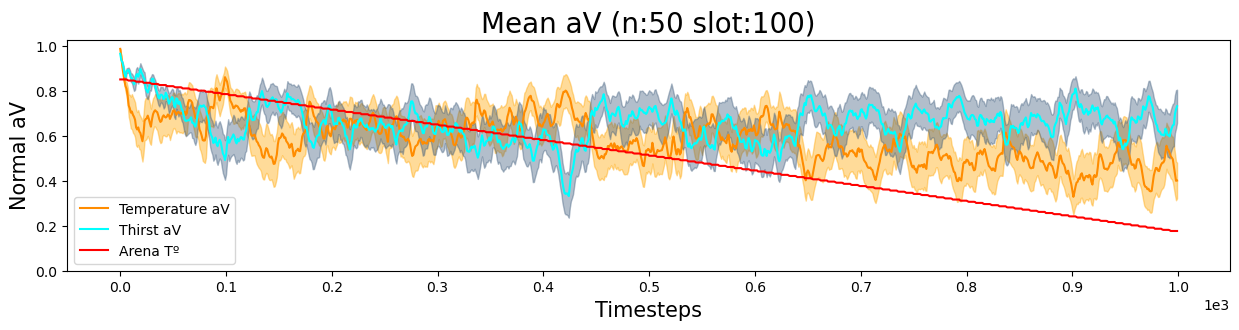

Normality test = NormaltestResult(statistic=5.947840004845922, pvalue=0.0511025948906432)


In [30]:
plt.figure(figsize=(15, 3))
plt.plot(aVTempSlotMean, label='Temperature aV', color="darkorange")
x = list(range(0, round(timesteps/mean_slot)))
plt.fill_between(np.array(x), np.array(aVTempSlotMean) - np.array([x / 2 for x in aVTempSlotVar]), np.array(aVTempSlotMean) + np.array([x / 2 for x in aVTempSlotVar]), color="orange", alpha=0.4) 
plt.plot(aVThirstSlotMean, label='Thirst aV', color="cyan")
plt.fill_between(np.array(x), np.array(aVThirstSlotMean) - np.array([x / 2 for x in aVThirstSlotVar]), np.array(aVThirstSlotMean) + np.array([x / 2 for x in aVThirstSlotVar]), color="#3F5D7D", alpha=0.4) 
plt.plot(GradTempSlotMean, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/100+1, step=timesteps/1000))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Mean aV (n:50 slot:100)', fontsize=20)
plt.ylabel('Normal aV', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()
print('Normality test = ' + str(sci.normaltest(aVTempSlotMean)))
if sci.normaltest(aVTempSlotMean)[1] < 0.05: print("Non-normal distribution")

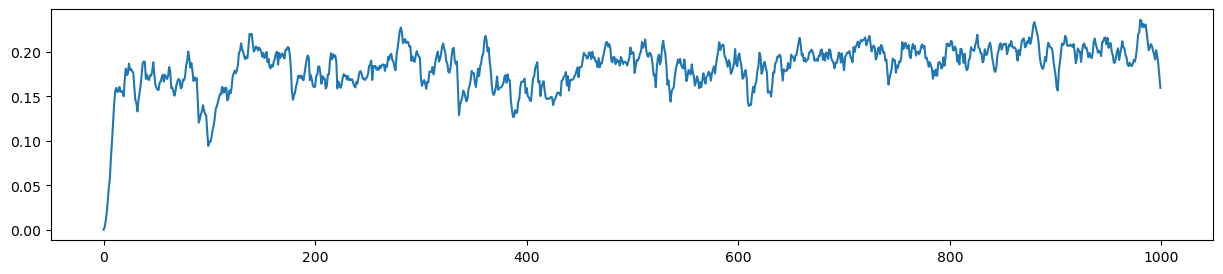

Normality test = NormaltestResult(statistic=529.7490603649095, pvalue=9.256635121888373e-116)
Non-normal distribution


In [31]:
plt.figure(figsize=(15, 3))
plt.plot(aVTempSlotVar)
plt.show()
print('Normality test = ' + str(sci.normaltest(aVTempSlotVar)))
if sci.normaltest(aVTempSlotVar)[1] < 0.05: print("Non-normal distribution")

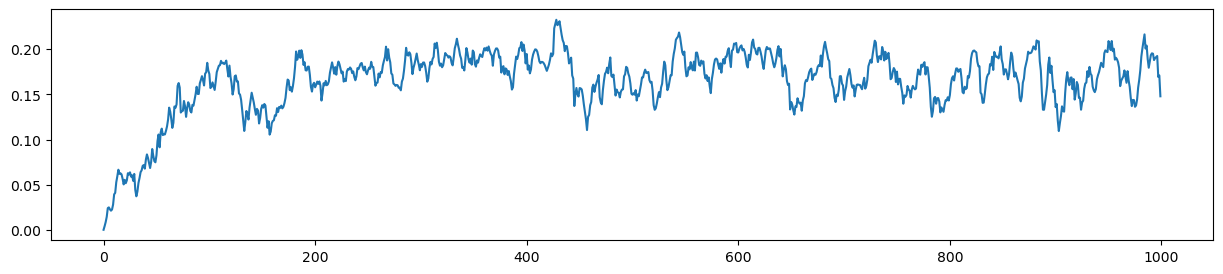

Normality test = NormaltestResult(statistic=366.7814066438087, pvalue=2.2616714455747366e-80)
Non-normal distribution


In [32]:
plt.figure(figsize=(15, 3))
plt.plot(aVThirstSlotVar)
plt.show()
print('Normality test = ' + str(sci.normaltest(aVThirstSlotVar)))
if sci.normaltest(aVThirstSlotVar)[1] < 0.05: print("Non-normal distribution")

In [44]:
period = []

for i in range(5):
    for j in range(int(timesteps/5)):
        period.append(i+1)

In [45]:
aVsTemp = []
aVsThirst = []
periods = []

for i in range(simulations):
    dict_name = 'data'+ str(i)
    aVsTemp += d[dict_name]['aVtemperature'].to_list()
    aVsThirst += d[dict_name]['aVthirst'].to_list()
    periods += period


In [46]:
df = pd.DataFrame({'aVTemp': aVsTemp, 'aVThirst': aVsThirst, 'Period': periods})

In [47]:
df

aVTemp  aVThirst  Period
0         0.999       1.0       1
1         0.998       1.0       1
2         0.997       1.0       1
3         0.996       1.0       1
4         0.995       1.0       1
...         ...       ...     ...
4999995   0.159       1.0       5
4999996   0.158       1.0       5
4999997   0.157       1.0       5
4999998   0.156       1.0       5
4999999   0.155       1.0       5

[5000000 rows x 3 columns]

/home/roboticslab/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/roboticslab/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/roboticslab/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/roboticslab/anaconda

<Figure size 1280x800 with 0 Axes>

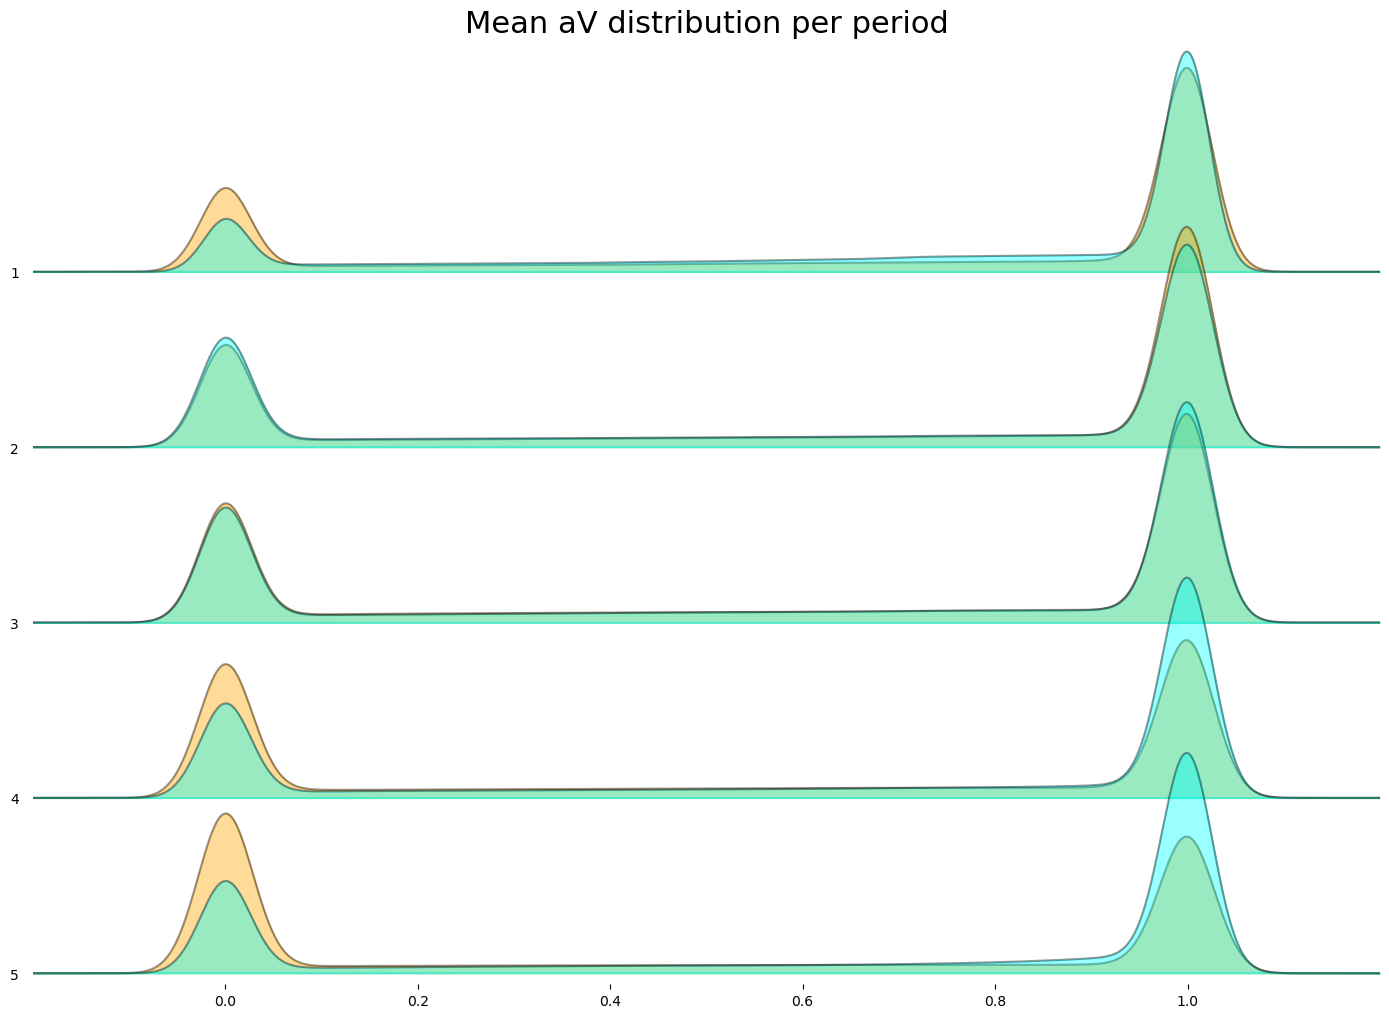

In [48]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['aVTemp', 'aVThirst'], by="Period", ylim='own', figsize=(14,10), color=["orange","cyan"], alpha=0.4)

# Decoration
plt.title('Mean aV distribution per period', fontsize=22)
plt.show()

In [50]:
periods = []

for i in range(5):
    for j in range(int(len(aVTempSlotMean)/5)):
        periods.append(i+1)

In [51]:
df_data = [aVTempSlotMean, aVThirstSlotMean, GradTempSlotMean, periods]

In [52]:
df = pd.DataFrame({'aVTemp': aVTempSlotMean, 'aVThirst': aVThirstSlotMean, 'GradTemp': GradTempSlotMean, 'Period': periods})

In [53]:
df

aVTemp  aVThirst  GradTemp  Period
0    0.988146  0.966254   0.85200       1
1    0.954403  0.937919   0.85200       1
2    0.907371  0.928468   0.85200       1
3    0.876697  0.907826   0.85200       1
4    0.844290  0.877729   0.85200       1
..        ...       ...       ...     ...
995  0.495923  0.647586   0.17700       5
996  0.464235  0.650212   0.17700       5
997  0.431658  0.698162   0.17700       5
998  0.400436  0.718713   0.17700       5
999  0.401732  0.732566   0.17695       5

[1000 rows x 4 columns]

/home/roboticslab/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/roboticslab/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/roboticslab/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/roboticslab/anaconda

<Figure size 800x800 with 0 Axes>

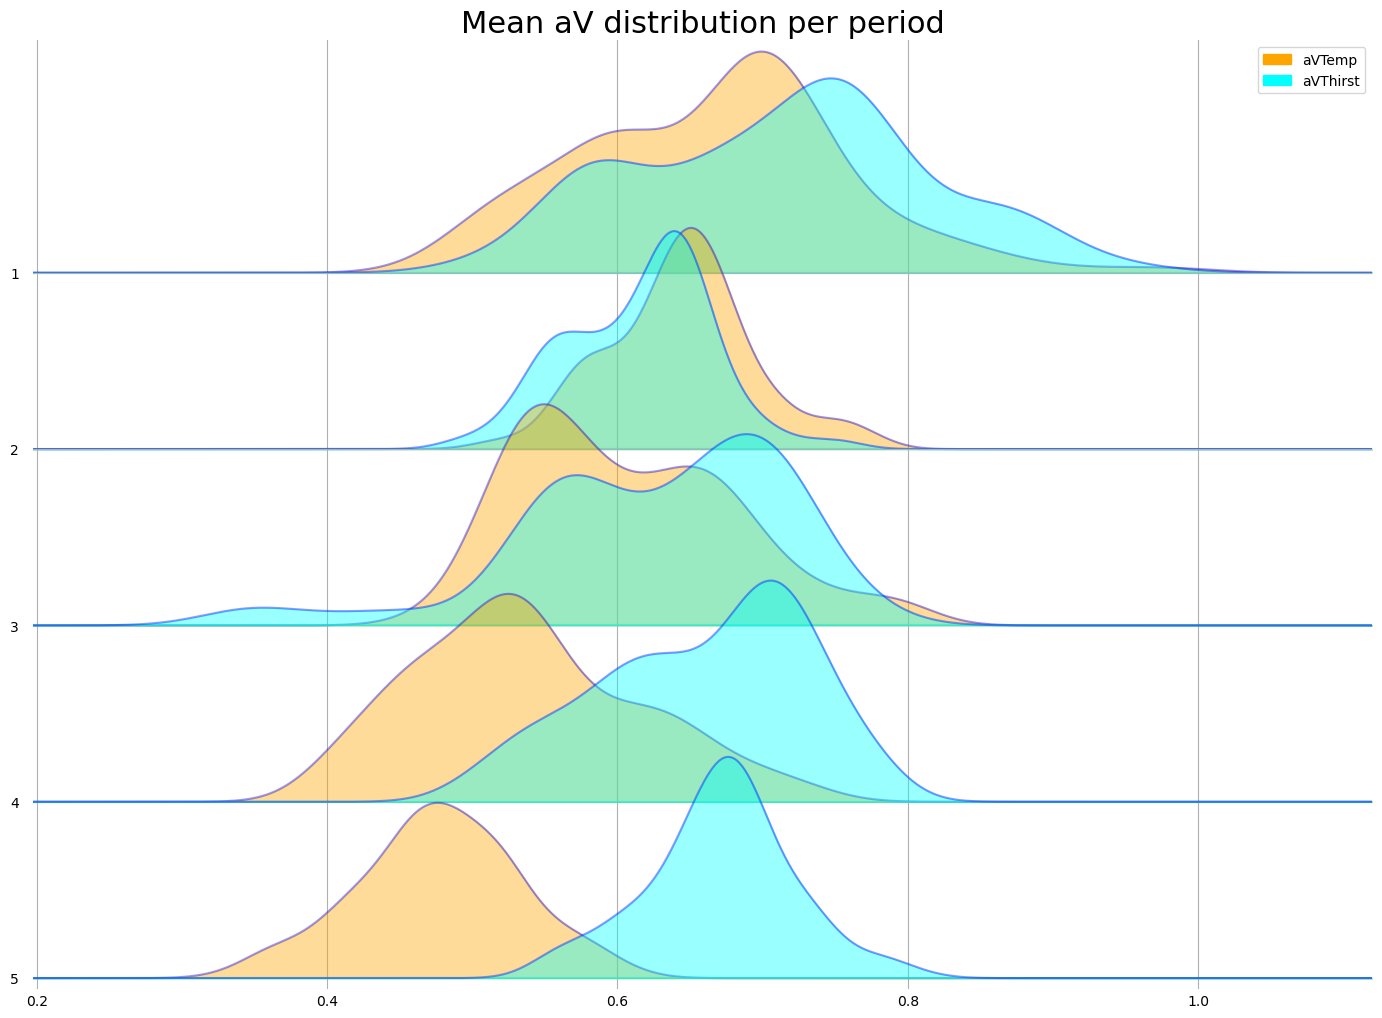

In [59]:
plt.figure(figsize=(10,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['aVTemp', 'aVThirst'], by="Period", ylim='own', figsize=(14,10), color=["orange","cyan"], linecolor="blue", alpha=0.4, grid=True, legend=True)

# Decoration
plt.title('Mean aV distribution per period', fontsize=22)
plt.show()